<a href="https://colab.research.google.com/github/AnnieMy28/initial_projects/blob/main/wholesale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Wholesale customers data.csv')

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dataset:
UCI Machine learning repository
https://archive.ics.uci.edu/dataset/292/wholesale+customers
creator: Margarida Cardoso

In [ ]:

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## DATA CLEANING

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
df.value_counts()

Channel  Region  Fresh  Milk   Grocery  Frozen  Detergents_Paper  Delicassen
1        1       514    8323   6869     529     93                1040          1
         3       43088  2100   2609     1200    1107              823           1
2        1       1073   9679   15445    61      5980              1265          1
                 572    9763   22182    2221    4882              2563          1
                 18     7504   15205    1285    4797              6372          1
                                                                               ..
1        3       4446   906    1238     3576    153               1014          1
                 4420   5139   2661     8872    1321              181           1
                 4020   3234   1498     2395    264               255           1
                 3884   3801   1641     876     397               4829          1
2        3       44466  54259  55571    7782    24171             6465          1
Length: 440, dtype: i

In [ ]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [ ]:
cat_cols = ['Region', 'Channel']
for column in cat_cols:
    print(df[column].value_counts())


3    316
1     77
2     47
Name: Region, dtype: int64
1    298
2    142
Name: Channel, dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


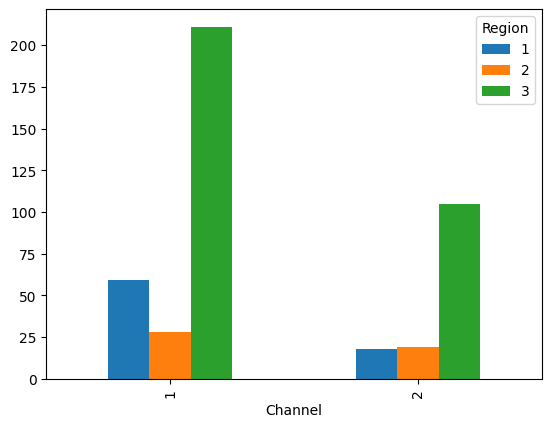

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [ ]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')

### **Exploratory Data Analysis**

We are going to start exploring our data with the Univariate analysis (each feature individually), before carrying the Bivariate analysis and compare pairs of features to find correlation between them

In [ ]:
import math
import pylab
%matplotlib inline

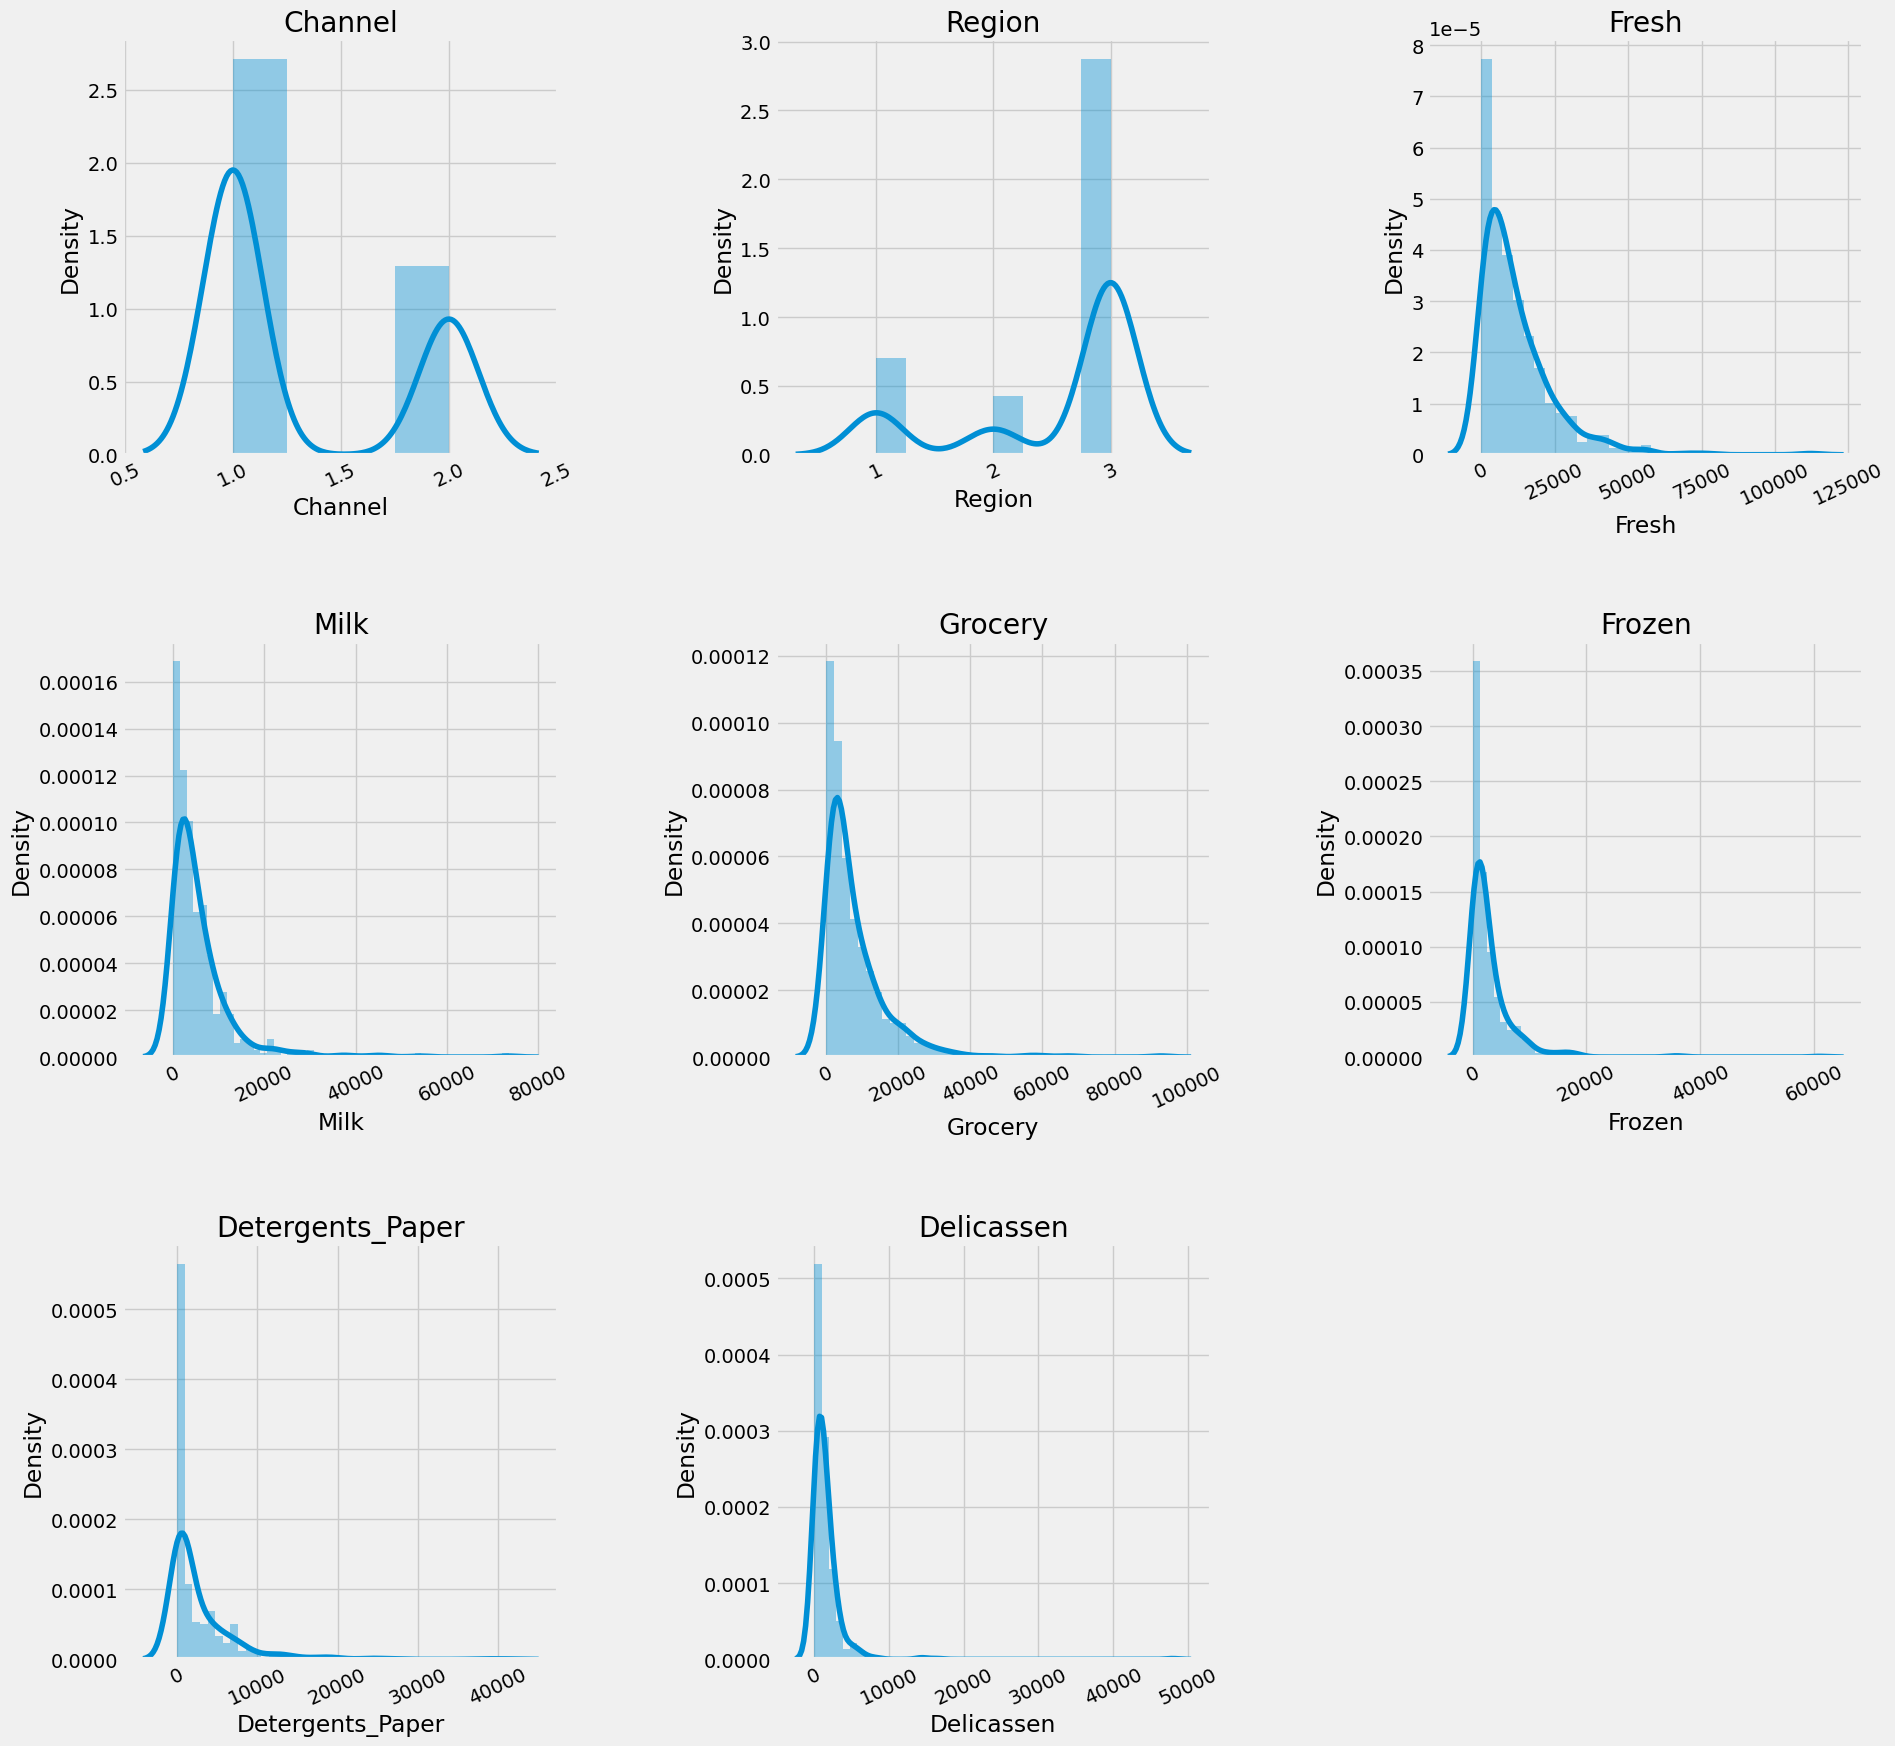

In [ ]:
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(df[column])
            plt.xticks(rotation=25)

plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [ ]:
import copy

In [ ]:
df1 = copy.deepcopy(df)
df1['Total_spending'] = df['Fresh'] + df['Milk'] + df['Delicassen'] + df['Detergents_Paper'] + df['Frozen'] +  df['Grocery']
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_spending
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834


In [ ]:
regiondf = df1.groupby('Region')['Total_spending'].sum()
print(regiondf)
print()
channeldf = df1.groupby('Channel')['Total_spending'].sum()
print(channeldf)

Region
1     2386813
2     1555088
3    10677599
Name: Total_spending, dtype: int64

Channel
1    7999569
2    6619931
Name: Total_spending, dtype: int64


Text(0.5, 1.0, 'Item - Fresh')

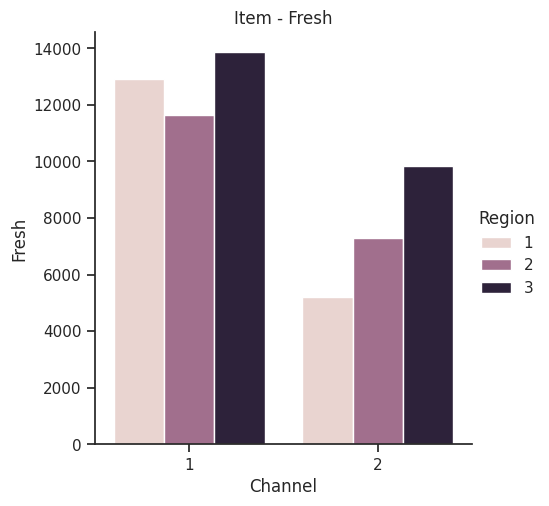

In [ ]:
sns.set(style="ticks", color_codes='true')
sns.catplot(x="Channel", y="Fresh", hue ="Region", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

Text(0.5, 1.0, 'Item - Fresh')

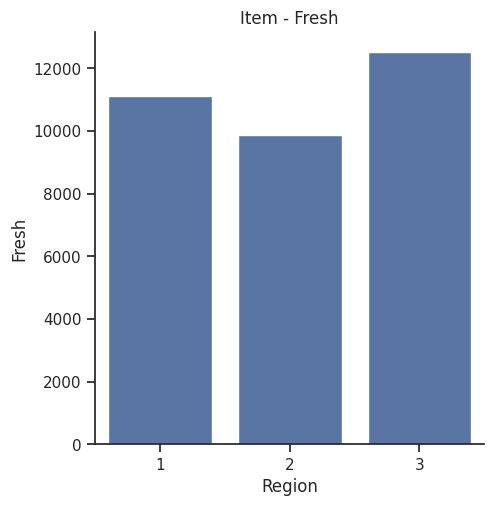

In [ ]:
sns.catplot(x="Region", y="Fresh", kind="bar", ci=None, data=df)
plt.title('Item - Fresh')

In [ ]:
products = df[df.columns[+2:df.columns.size]]
standard_deviation_items = products.std() #use standard deviation to check the measure of variabilty
standard_deviation_items.round(2)

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicassen           2820.11
dtype: float64

## **Bivariate**

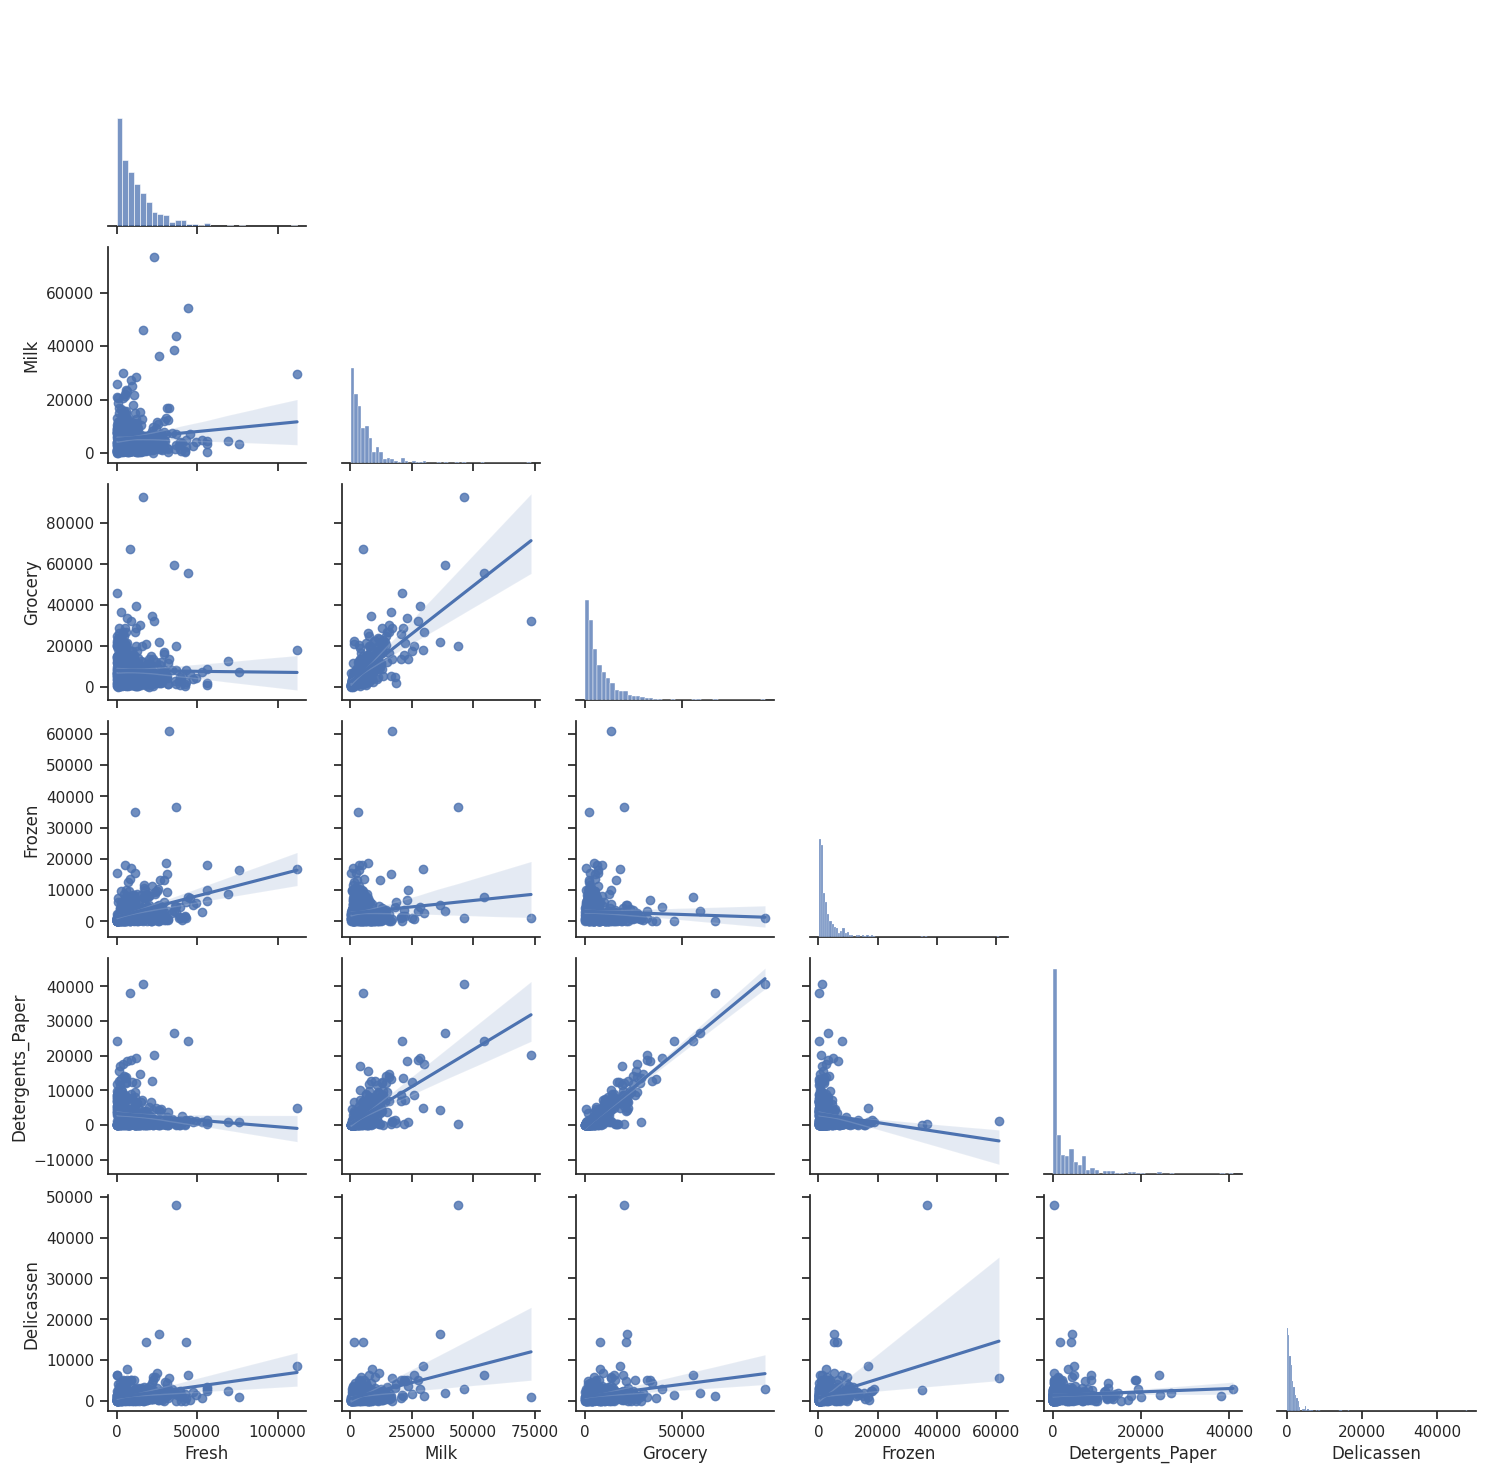

In [ ]:
sns.set(style="ticks")
g = sns.pairplot(products,corner=True,kind='reg')
g.fig.set_size_inches(15,15)


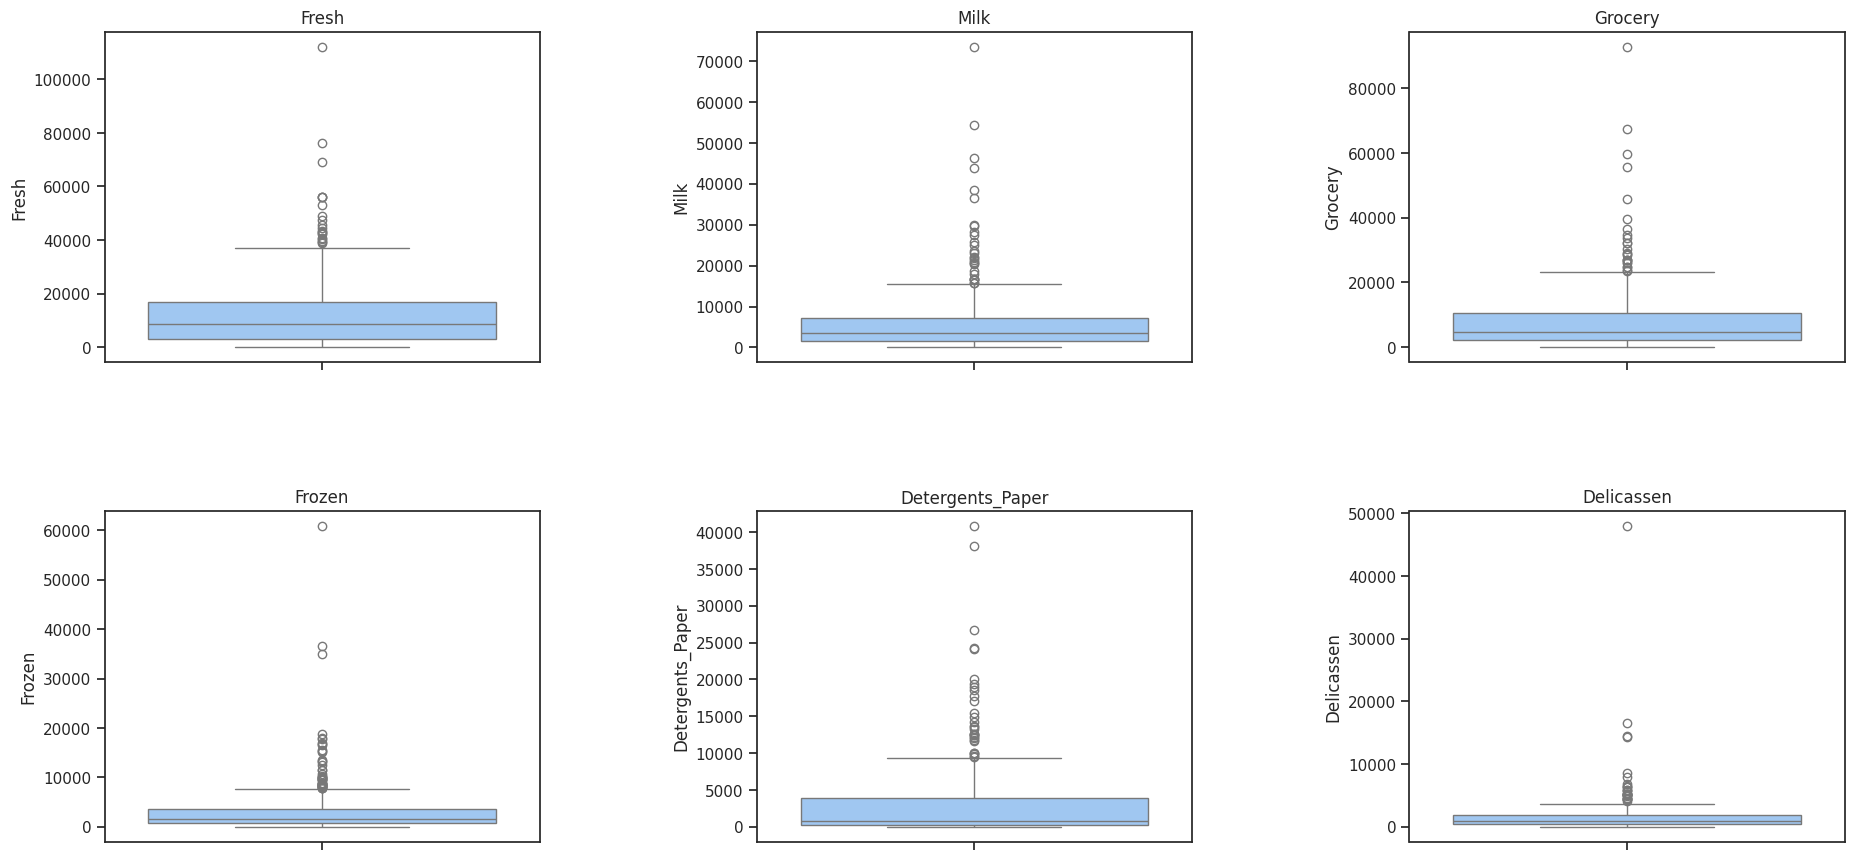

In [ ]:
def plot_distribution(df2, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-pastel')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df2.shape[1]) / cols)
    for i, column in enumerate(df2.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        g = sns.boxplot(df2[column])
        plt.xticks(rotation=25)

plot_distribution(products, cols=3, width=20, height=10, hspace=0.45, wspace=0.5)

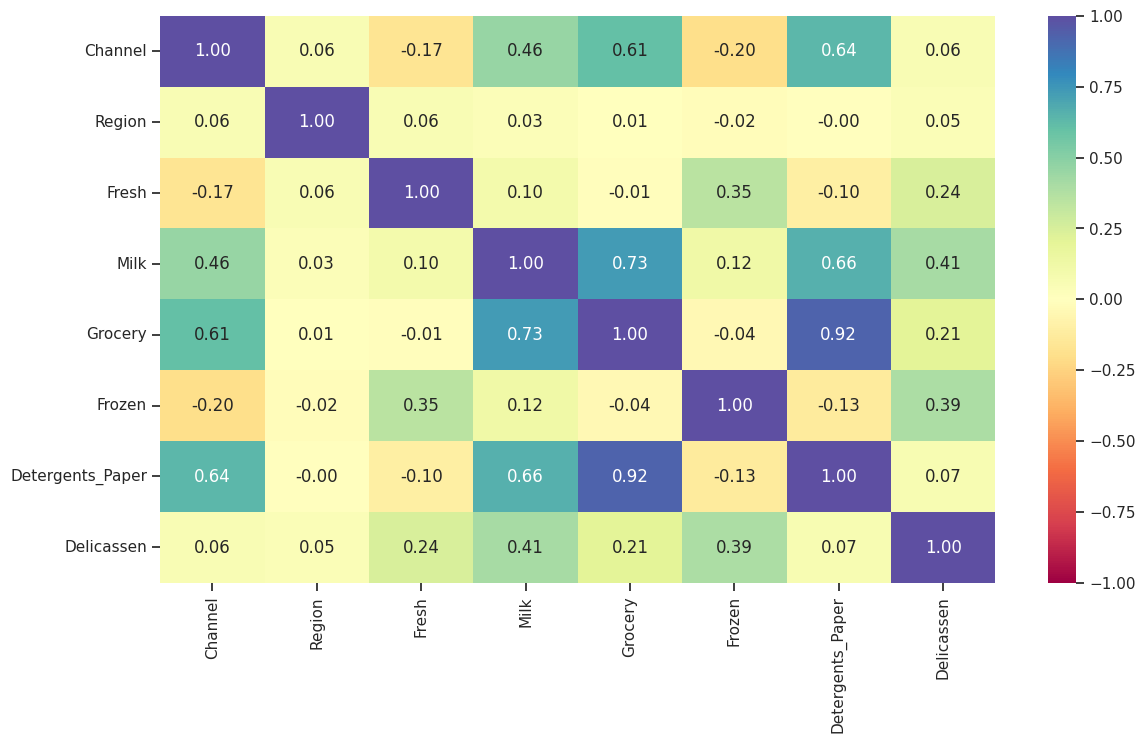

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer




**Data Preparation for Modeling**

## **Building the model**

We will be building 4 different models:

* Logistic Regression

* Support Vector Machine (SVM)

* Decision Tree

* Random Forest

In [ ]:
data = df.copy()

In [ ]:
X = data.drop(["Channel", 'Region'], axis=1)
Y = data["Channel"]


In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (308, 6)
Shape of test set :  (132, 6)
Percentage of classes in training set:
1    0.678571
2    0.321429
Name: Channel, dtype: float64
Percentage of classes in test set:
1    0.674242
2    0.325758
Name: Channel, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           1       0.93      0.94      0.94       209
           2       0.88      0.86      0.87        99

    accuracy                           0.92       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.92      0.92      0.92       308



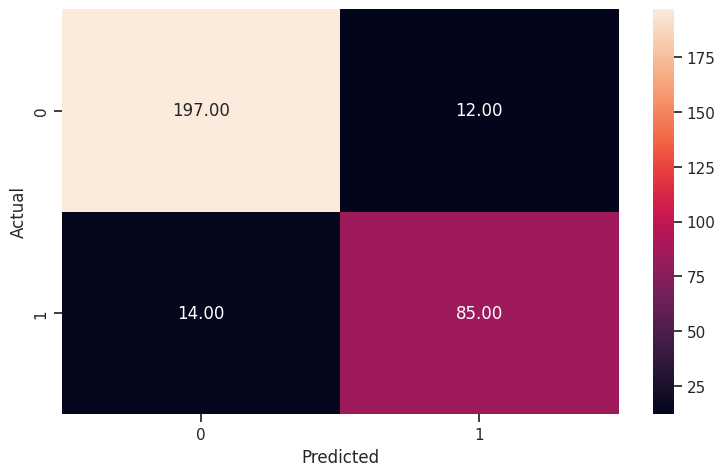

In [ ]:
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           1       0.92      0.94      0.93        89
           2       0.88      0.84      0.86        43

    accuracy                           0.91       132
   macro avg       0.90      0.89      0.90       132
weighted avg       0.91      0.91      0.91       132



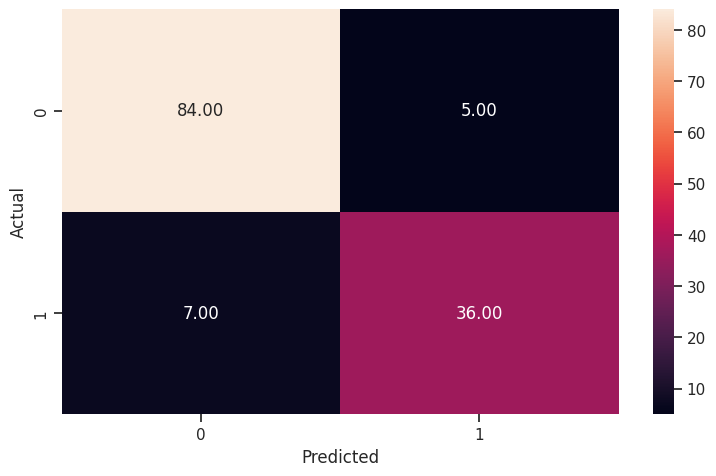

In [ ]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

In [ ]:

from sklearn.metrics import roc_curve, auc

## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.88      0.89        89
           2       0.76      0.81      0.79        43

    accuracy                           0.86       132
   macro avg       0.83      0.85      0.84       132
weighted avg       0.86      0.86      0.86       132



## ** Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.93      0.92        89
           2       0.85      0.79      0.82        43

    accuracy                           0.89       132
   macro avg       0.88      0.86      0.87       132
weighted avg       0.89      0.89      0.89       132



# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89        89
           2       0.76      0.79      0.77        43

    accuracy                           0.85       132
   macro avg       0.83      0.83      0.83       132
weighted avg       0.85      0.85      0.85       132



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89        89
           2       0.76      0.79      0.77        43

    accuracy                           0.85       132
   macro avg       0.83      0.83      0.83       132
weighted avg       0.85      0.85      0.85       132



## **Random forest**

In [ ]:
rf_estimator = RandomForestClassifier( random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       209
           2       1.00      1.00      1.00        99

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



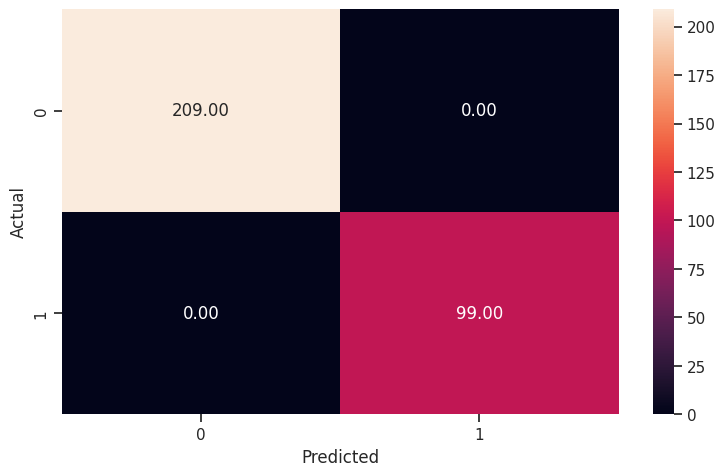

In [ ]:
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           1       0.93      0.94      0.94        89
           2       0.88      0.86      0.87        43

    accuracy                           0.92       132
   macro avg       0.91      0.90      0.90       132
weighted avg       0.92      0.92      0.92       132



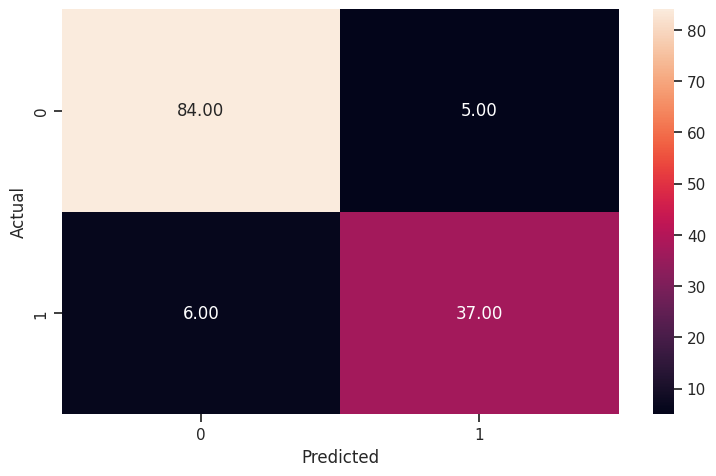

In [ ]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=50,
                       random_state=1)

### *Check the performance of the model on the train and test data using the tuned *

#### Checking performance on the training set

              precision    recall  f1-score   support

           1       0.98      0.94      0.96       209
           2       0.88      0.96      0.92        99

    accuracy                           0.94       308
   macro avg       0.93      0.95      0.94       308
weighted avg       0.95      0.94      0.95       308



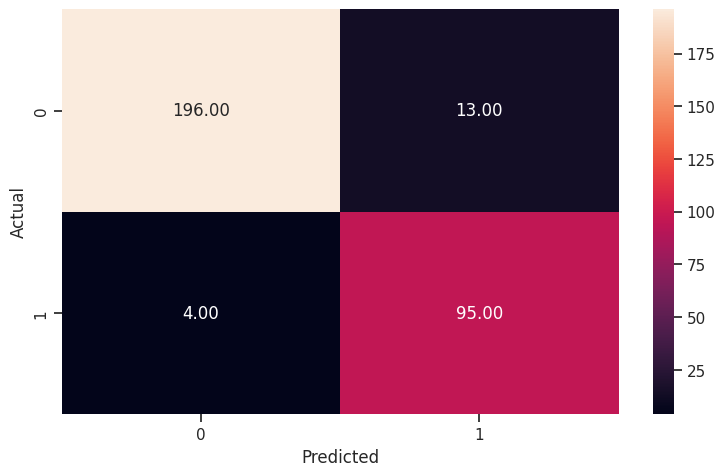

In [ ]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

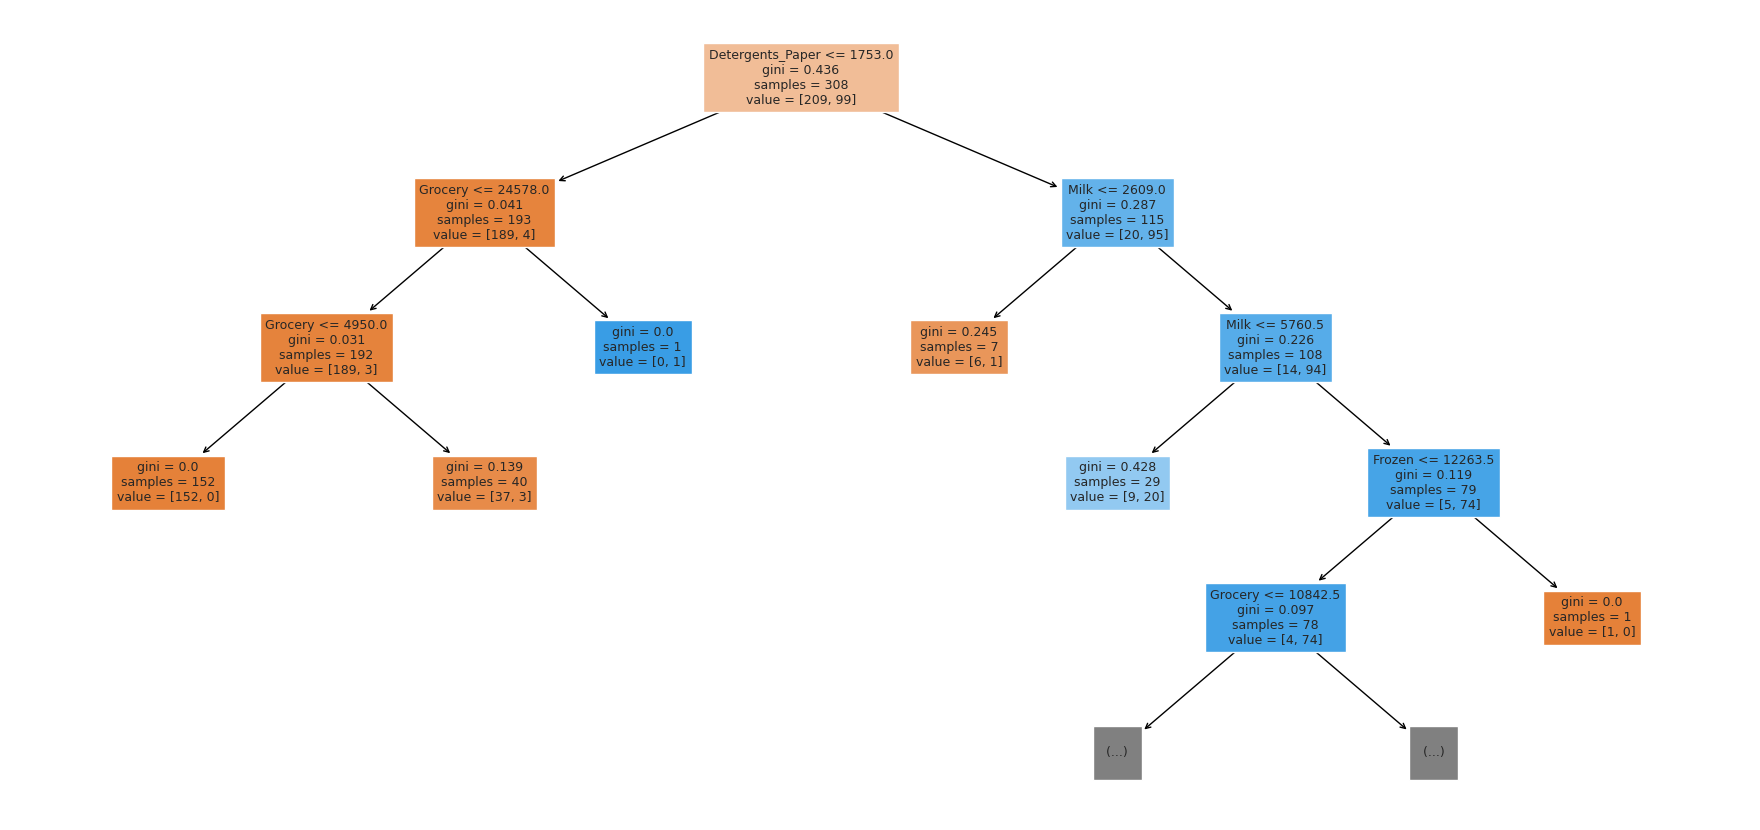

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## **data preparation for modelling **

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
X= df.iloc[:,2:]
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
y = df[df.columns[2]].values

In [ ]:
X.shape, y.shape

((440, 6), (440,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
!pip install pyyaml

In [ ]:
import tensorflow.compat.v1 as tf

from tensorflow.keras import layers

print(tf.version.VERSION)


2.15.0


In [ ]:
X = df[df.columns[2:]].values
y = df[df.columns[2]].values

In [ ]:
X.shape, y.shape

((440, 6), (440,))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
data = np.hstack((X, np.reshape (y, (0, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

ValueError: cannot reshape array of size 440 into shape (0,1)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'), # if x <= 0 --> 0, x > 0 --> x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs=15, validation_data=(X_valid, y_valid))

In [ ]:
model.evaluate(X_test, y_test)